# Data Transformation and feature evaluation for set 3

In [120]:
from pathlib import Path
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from knee_stress_predict.config import raw_data_dir, processed_data_dir

This notebook prepare data for training time serial model.

## Step 1: Load data

In [121]:
data_set_name = "set_3"
file_path = Path.joinpath(processed_data_dir, data_set_name,  "out.csv")
result = pd.read_csv(file_path)
result = result.drop('Unnamed: 0', axis=1)
result.reset_index()

,index,Code,Patella_PN,Femur_PN,Tibia_PN,Patella_Car_PN,Femur_Car_PN,Tibia_M_Car_PN,Tibia_L_Car_PN,Patella_volume,...,med_frame_232,med_frame_233,med_frame_234,med_frame_235,med_frame_236,med_frame_237,med_frame_238,med_frame_239,med_frame_240,med_Max_all_frames
0,0,9003406M00,1137,4142,2789,5275,21420,2840,2840,33682.157434,...,9.932714,9.782494,9.542757,9.550017,9.888674,10.287620,10.229705,10.525443,10.990571,34.044975
1,1,9003406M12,1126,4113,2684,5900,21030,2840,2840,33039.218053,...,9.903366,9.658813,9.345903,8.863383,8.515292,8.726943,8.729221,8.886322,9.224288,31.649405
2,2,9007827M00,771,3414,2596,4485,18385,2840,2840,21736.919532,...,6.736033,6.599309,6.549271,6.820798,6.718779,6.745682,6.785289,6.868892,7.046464,26.223894
3,3,9007827M12,730,3404,2600,5055,18755,2840,2840,20866.993760,...,6.093854,6.118194,6.276575,6.574237,6.211847,6.384310,6.605030,6.585426,6.867692,24.808067
4,4,9040390M00,670,3907,2560,4935,19150,2840,2840,17988.202111,...,122.954926,123.055641,123.183105,123.373184,123.773911,123.798569,123.820938,123.799873,123.741707,137.528534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,164,9993650M12,686,2963,2388,4405,20910,2155,2840,15821.015946,...,31.751848,33.184460,34.442417,30.123833,15.865294,15.989101,16.239870,16.647863,17.259405,34.442417
165,165,9993833M00,795,3669,2724,4765,20410,2840,2840,22375.020348,...,8.976914,8.909942,10.684889,11.045062,10.653504,9.277707,9.529099,9.912118,10.419240,22.278835
166,166,9993833M12,801,3805,2575,4885,20400,2840,2840,22439.863013,...,9.059080,9.370121,10.105094,9.852423,9.866968,9.584963,9.702561,9.904342,10.722541,26.929873
167,167,9993846M00,868,3794,3029,5430,20755,2840,2840,25084.417057,...,7.429334,7.494839,7.629389,7.617738,7.752455,8.115380,7.971771,8.071439,8.470410,22.764488


### Remove outliers:

#### Check distribution of maximal contact pressure

(array([154.,   6.,   1.,   1.,   1.,   1.,   0.,   3.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  10.13031101,   45.5251942 ,   80.92007739,  116.31496058,
         151.70984376,  187.10472695,  222.49961014,  257.89449333,
         293.28937651,  328.6842597 ,  364.07914289,  399.47402608,
         434.86890926,  470.26379245,  505.65867564,  541.05355883,
         576.44844201,  611.8433252 ,  647.23820839,  682.63309158,
         718.02797476,  753.42285795,  788.81774114,  824.21262433,
         859.60750751,  895.0023907 ,  930.39727389,  965.79215708,
        1001.18704027, 1036.58192345, 1071.97680664]),
 <BarContainer object of 30 artists>)

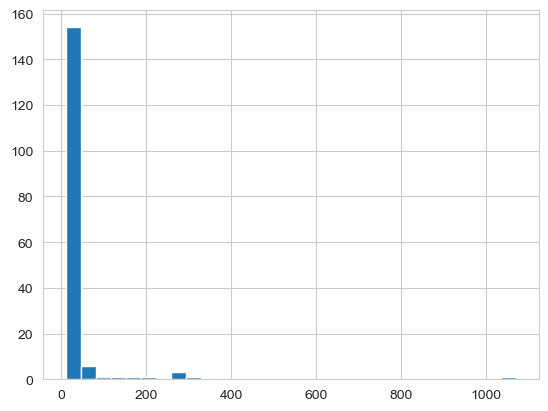

In [122]:
plt.hist(result['med_Max_all_frames'], bins = 30)

(array([84., 71.,  9.,  1.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([ 10.92055035,  21.75024233,  32.57993431,  43.40962629,
         54.23931828,  65.06901026,  75.89870224,  86.72839422,
         97.5580862 , 108.38777819, 119.21747017, 130.04716215,
        140.87685413, 151.70654612, 162.5362381 , 173.36593008,
        184.19562206, 195.02531404, 205.85500603, 216.68469801,
        227.51438999, 238.34408197, 249.17377396, 260.00346594,
        270.83315792, 281.6628499 , 292.49254189, 303.32223387,
        314.15192585, 324.98161783, 335.81130981]),
 <BarContainer object of 30 artists>)

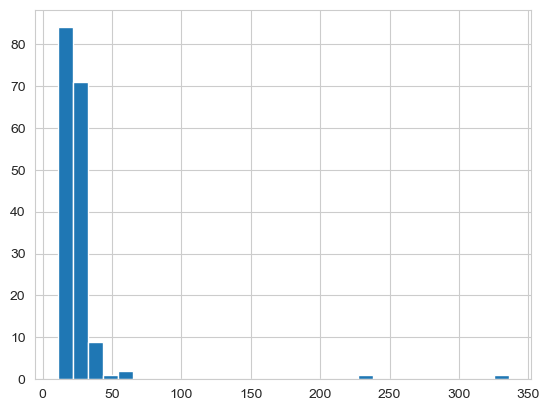

In [123]:
plt.hist(result['lat_Max_all_frames'], bins = 30)

In [124]:
def remove_outliers(data, cut_off=100):

    result_no_outliers = data[data['med_Max_all_frames'] < cut_off]
    result_no_outliers = result_no_outliers[result_no_outliers['lat_Max_all_frames'] < cut_off]

    return result_no_outliers

Contact pressure for both medial and lateral cartilages is distributed very unequally. There are outliers with unusually high contact pressure. Let’s remove outliers, knee with high maximal tibia cartilage contact pressure (>100). Since we have data for all 240-time points, we do not need to remove the whole simulation but just corrupted frames.

In [125]:
result = remove_outliers(result)

In [126]:
result

,Code,Patella_PN,Femur_PN,Tibia_PN,Patella_Car_PN,Femur_Car_PN,Tibia_M_Car_PN,Tibia_L_Car_PN,Patella_volume,Femur_volume,...,med_frame_232,med_frame_233,med_frame_234,med_frame_235,med_frame_236,med_frame_237,med_frame_238,med_frame_239,med_frame_240,med_Max_all_frames
0,9003406M00,1137,4142,2789,5275,21420,2840,2840,33682.157434,231437.991665,...,9.932714,9.782494,9.542757,9.550017,9.888674,10.287620,10.229705,10.525443,10.990571,34.044975
1,9003406M12,1126,4113,2684,5900,21030,2840,2840,33039.218053,228671.171460,...,9.903366,9.658813,9.345903,8.863383,8.515292,8.726943,8.729221,8.886322,9.224288,31.649405
2,9007827M00,771,3414,2596,4485,18385,2840,2840,21736.919532,184294.924991,...,6.736033,6.599309,6.549271,6.820798,6.718779,6.745682,6.785289,6.868892,7.046464,26.223894
3,9007827M12,730,3404,2600,5055,18755,2840,2840,20866.993760,184114.045604,...,6.093854,6.118194,6.276575,6.574237,6.211847,6.384310,6.605030,6.585426,6.867692,24.808067
5,9040390M12,667,3814,2631,5245,19370,2840,2840,17949.168458,221202.458278,...,9.060805,8.661175,8.343982,9.099851,8.527630,8.603285,8.605572,10.504917,9.194585,25.919180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,9993650M12,686,2963,2388,4405,20910,2155,2840,15821.015946,140615.628188,...,31.751848,33.184460,34.442417,30.123833,15.865294,15.989101,16.239870,16.647863,17.259405,34.442417
165,9993833M00,795,3669,2724,4765,20410,2840,2840,22375.020348,207318.185631,...,8.976914,8.909942,10.684889,11.045062,10.653504,9.277707,9.529099,9.912118,10.419240,22.278835
166,9993833M12,801,3805,2575,4885,20400,2840,2840,22439.863013,215968.865103,...,9.059080,9.370121,10.105094,9.852423,9.866968,9.584963,9.702561,9.904342,10.722541,26.929873
167,9993846M00,868,3794,3029,5430,20755,2840,2840,25084.417057,216622.182978,...,7.429334,7.494839,7.629389,7.617738,7.752455,8.115380,7.971771,8.071439,8.470410,22.764488


## Correlation matrix

###  All 240 frames

Text(0.5, 1.0, 'No outliers Correlation Heatmap for all frames')

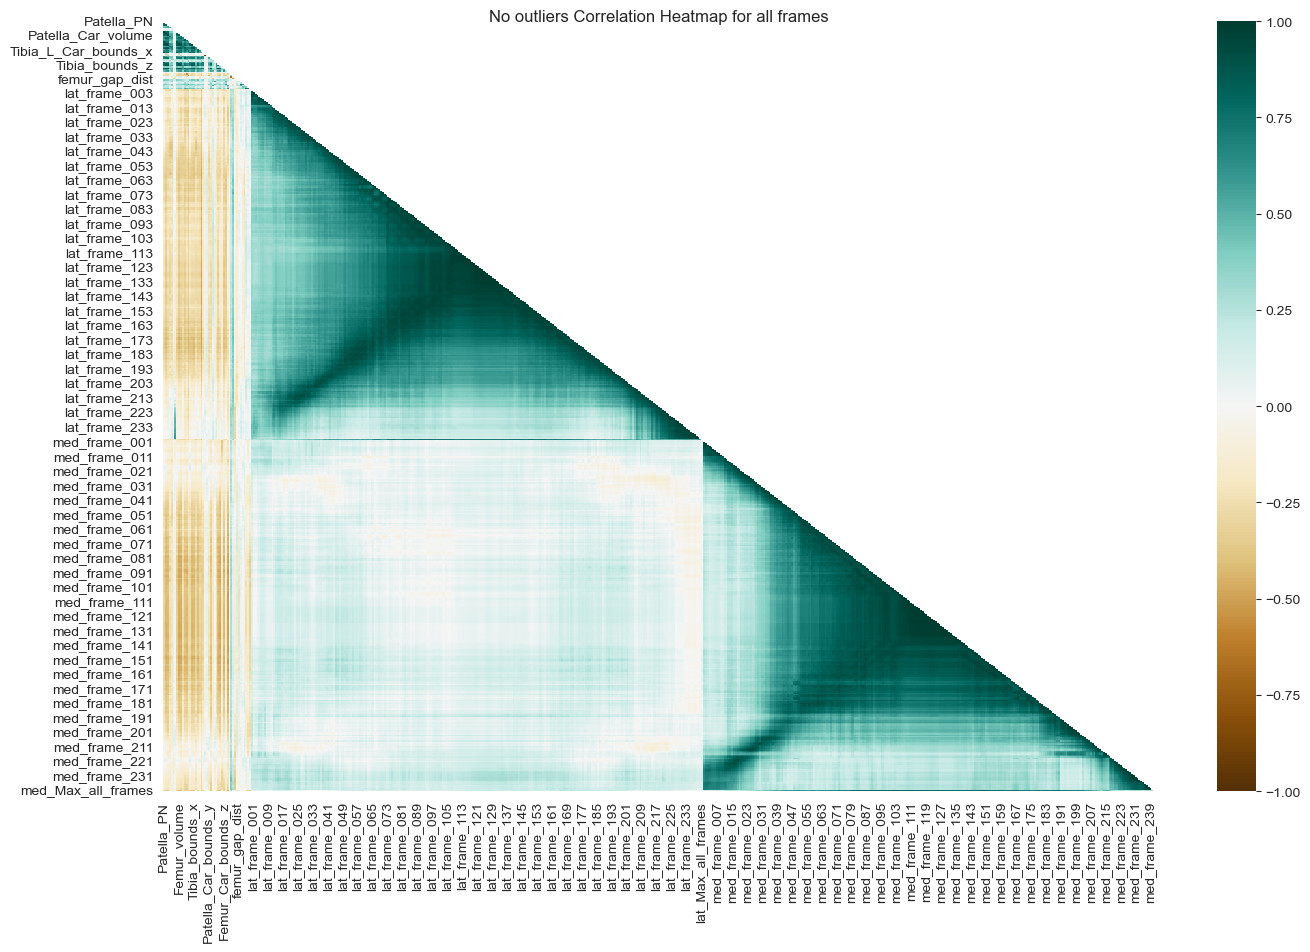

In [127]:
plt.figure(figsize=(16, 10))
mask = np.triu(np.ones_like(result.corr(), dtype=np.bool))
heatmap = sns.heatmap(result.corr(), mask=mask, vmin=-1, vmax=1, annot=False, cmap='BrBG')
heatmap.set_title('No outliers Correlation Heatmap for all frames', fontdict={'fontsize':12}, pad=0)

### Transform categorical features to dummy

Transform "Simulation_len" to dummy variable. We have only two options for that variable 0 and 12


In [128]:
result['Simulation_len'] = pd.get_dummies(result['Simulation_len'], drop_first=True)
result.rename(columns={"Simulation_len": "12_month_sim"})

,Code,Patella_PN,Femur_PN,Tibia_PN,Patella_Car_PN,Femur_Car_PN,Tibia_M_Car_PN,Tibia_L_Car_PN,Patella_volume,Femur_volume,...,med_frame_232,med_frame_233,med_frame_234,med_frame_235,med_frame_236,med_frame_237,med_frame_238,med_frame_239,med_frame_240,med_Max_all_frames
0,9003406M00,1137,4142,2789,5275,21420,2840,2840,33682.157434,231437.991665,...,9.932714,9.782494,9.542757,9.550017,9.888674,10.287620,10.229705,10.525443,10.990571,34.044975
1,9003406M12,1126,4113,2684,5900,21030,2840,2840,33039.218053,228671.171460,...,9.903366,9.658813,9.345903,8.863383,8.515292,8.726943,8.729221,8.886322,9.224288,31.649405
2,9007827M00,771,3414,2596,4485,18385,2840,2840,21736.919532,184294.924991,...,6.736033,6.599309,6.549271,6.820798,6.718779,6.745682,6.785289,6.868892,7.046464,26.223894
3,9007827M12,730,3404,2600,5055,18755,2840,2840,20866.993760,184114.045604,...,6.093854,6.118194,6.276575,6.574237,6.211847,6.384310,6.605030,6.585426,6.867692,24.808067
5,9040390M12,667,3814,2631,5245,19370,2840,2840,17949.168458,221202.458278,...,9.060805,8.661175,8.343982,9.099851,8.527630,8.603285,8.605572,10.504917,9.194585,25.919180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,9993650M12,686,2963,2388,4405,20910,2155,2840,15821.015946,140615.628188,...,31.751848,33.184460,34.442417,30.123833,15.865294,15.989101,16.239870,16.647863,17.259405,34.442417
165,9993833M00,795,3669,2724,4765,20410,2840,2840,22375.020348,207318.185631,...,8.976914,8.909942,10.684889,11.045062,10.653504,9.277707,9.529099,9.912118,10.419240,22.278835
166,9993833M12,801,3805,2575,4885,20400,2840,2840,22439.863013,215968.865103,...,9.059080,9.370121,10.105094,9.852423,9.866968,9.584963,9.702561,9.904342,10.722541,26.929873
167,9993846M00,868,3794,3029,5430,20755,2840,2840,25084.417057,216622.182978,...,7.429334,7.494839,7.629389,7.617738,7.752455,8.115380,7.971771,8.071439,8.470410,22.764488


In [129]:
result['tib_lat_ishealthy'] = pd.get_dummies(result['tib_lat_ishealthy'], drop_first=True)
result['tib_med_ishealthy'] = pd.get_dummies(result['tib_med_ishealthy'], drop_first=True)

In [130]:
result

,Code,Patella_PN,Femur_PN,Tibia_PN,Patella_Car_PN,Femur_Car_PN,Tibia_M_Car_PN,Tibia_L_Car_PN,Patella_volume,Femur_volume,...,med_frame_232,med_frame_233,med_frame_234,med_frame_235,med_frame_236,med_frame_237,med_frame_238,med_frame_239,med_frame_240,med_Max_all_frames
0,9003406M00,1137,4142,2789,5275,21420,2840,2840,33682.157434,231437.991665,...,9.932714,9.782494,9.542757,9.550017,9.888674,10.287620,10.229705,10.525443,10.990571,34.044975
1,9003406M12,1126,4113,2684,5900,21030,2840,2840,33039.218053,228671.171460,...,9.903366,9.658813,9.345903,8.863383,8.515292,8.726943,8.729221,8.886322,9.224288,31.649405
2,9007827M00,771,3414,2596,4485,18385,2840,2840,21736.919532,184294.924991,...,6.736033,6.599309,6.549271,6.820798,6.718779,6.745682,6.785289,6.868892,7.046464,26.223894
3,9007827M12,730,3404,2600,5055,18755,2840,2840,20866.993760,184114.045604,...,6.093854,6.118194,6.276575,6.574237,6.211847,6.384310,6.605030,6.585426,6.867692,24.808067
5,9040390M12,667,3814,2631,5245,19370,2840,2840,17949.168458,221202.458278,...,9.060805,8.661175,8.343982,9.099851,8.527630,8.603285,8.605572,10.504917,9.194585,25.919180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,9993650M12,686,2963,2388,4405,20910,2155,2840,15821.015946,140615.628188,...,31.751848,33.184460,34.442417,30.123833,15.865294,15.989101,16.239870,16.647863,17.259405,34.442417
165,9993833M00,795,3669,2724,4765,20410,2840,2840,22375.020348,207318.185631,...,8.976914,8.909942,10.684889,11.045062,10.653504,9.277707,9.529099,9.912118,10.419240,22.278835
166,9993833M12,801,3805,2575,4885,20400,2840,2840,22439.863013,215968.865103,...,9.059080,9.370121,10.105094,9.852423,9.866968,9.584963,9.702561,9.904342,10.722541,26.929873
167,9993846M00,868,3794,3029,5430,20755,2840,2840,25084.417057,216622.182978,...,7.429334,7.494839,7.629389,7.617738,7.752455,8.115380,7.971771,8.071439,8.470410,22.764488


## Step 3: Transform data

Now let's create a tall table, so we can extract data in a specific tall format, which is more useful for training models.

## Step 2: Split data

In [131]:
rng = np.random.RandomState(20221029)

test_dataset = result.sample(frac=0.15, random_state=rng)
train_mask = pd.Series(True, index=result.index)
train_mask[test_dataset.index] = False
train_dataset = result[train_mask].copy()
train_dataset.head()

,Code,Patella_PN,Femur_PN,Tibia_PN,Patella_Car_PN,Femur_Car_PN,Tibia_M_Car_PN,Tibia_L_Car_PN,Patella_volume,Femur_volume,...,med_frame_232,med_frame_233,med_frame_234,med_frame_235,med_frame_236,med_frame_237,med_frame_238,med_frame_239,med_frame_240,med_Max_all_frames
1,9003406M12,1126,4113,2684,5900,21030,2840,2840,33039.218053,228671.171460,...,9.903366,9.658813,9.345903,8.863383,8.515292,8.726943,8.729221,8.886322,9.224288,31.649405
2,9007827M00,771,3414,2596,4485,18385,2840,2840,21736.919532,184294.924991,...,6.736033,6.599309,6.549271,6.820798,6.718779,6.745682,6.785289,6.868892,7.046464,26.223894
3,9007827M12,730,3404,2600,5055,18755,2840,2840,20866.993760,184114.045604,...,6.093854,6.118194,6.276575,6.574237,6.211847,6.384310,6.605030,6.585426,6.867692,24.808067
5,9040390M12,667,3814,2631,5245,19370,2840,2840,17949.168458,221202.458278,...,9.060805,8.661175,8.343982,9.099851,8.527630,8.603285,8.605572,10.504917,9.194585,25.919180
6,9047800M00,971,3746,2799,4985,22785,2840,2840,30455.804840,217672.765536,...,6.542913,6.926604,7.195845,7.053719,7.179501,7.233837,7.422597,7.737132,7.975105,14.729120


In [132]:
def transform_to_tall(data):
    column_names = list(data.columns)
    column_names = [item for item in column_names if 'med_frame' not in item]
    column_names = [item for item in column_names if 'lat_frame' not in item]

    data = pd.wide_to_long(data,
                        stubnames=["med_frame_", "lat_frame_"],
                        i=column_names,
                        j="frame")
    data = data.rename(columns={"med_frame_": "Max_tib_med_contact_pressure", "lat_frame_": "Max_tib_lat_contact_pressure"})
    data = data.reset_index()

    return data


In [133]:
train_dataset = transform_to_tall(train_dataset)
test_dataset = transform_to_tall(test_dataset)

## Save data

In [134]:
train_output_path = Path.joinpath(processed_data_dir, data_set_name, "train_cleaned.csv")
train_dataset.to_csv(train_output_path)

test_output_path = Path.joinpath(processed_data_dir, data_set_name, "test_cleaned.csv")
test_dataset.to_csv(test_output_path)